In [1]:
import findspark
findspark.init()
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext
import os
import numpy as np
import pyspark.sql.functions as f
import subprocess
from pyspark.sql.functions import min, max, col
from pyspark.sql.functions import *

In [2]:
sc = SparkContext()
sqlcontext = SQLContext(sc)

In [3]:
df = sqlcontext.read.csv("/user/hadoop/land_value_adm/part-00000-a8a7d22a-f998-4608-8d4c-f9df0185c067-c000.csv")

In [4]:
t = df.withColumn('Dong', regexp_extract('_c2', '(^[0-9]{8})', 1))

In [5]:
t.show()
t.count()

+-------------------+---------+----------+--------+
|                _c0|      _c1|       _c2|    Dong|
+-------------------+---------+----------+--------+
|1111010200100010028|2084400.0|1111051500|11110515|
|1111010500100210013|4045600.0|1111051500|11110515|
|1111010600100250004|3296200.0|1111053000|11110530|
|1111010800101470001|7340800.0|1111051500|11110515|
|1111010900100230000|2660000.0|1111051500|11110515|
|1111010900100380001|3249200.0|1111051500|11110515|
|1111010900101660077|2928000.0|1111051500|11110515|
|1111011000100780003|4866000.0|1111051500|11110515|
|1111011100100190012|3014800.0|1111051500|11110515|
|1111011100100470065|3179600.0|1111051500|11110515|
|1111011100100470162|2553000.0|1111051500|11110515|
|1111011100101100000|2991000.0|1111051500|11110515|
|1111011200101190000|3204200.0|1111053000|11110530|
|1111012000102390000|  4.017E7|1111053000|11110530|
|1111012100100010165|3542400.0|1111053000|11110530|
|1111012100101080007|8732400.0|1111053000|11110530|
|11110122001

634691

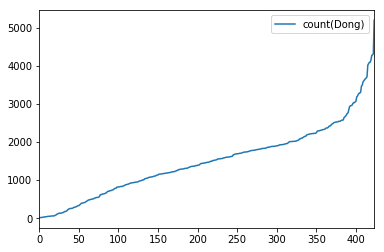

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

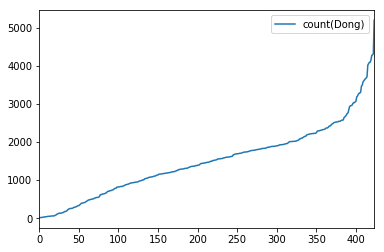

In [29]:
df =t.groupBy("Dong").agg(f.count('Dong'))
pd =df.sort('count(Dong)').toPandas()
pd.plot()
plt.show()

In [30]:
dong_df = sqlcontext.read.option("header","true").csv("data/cur_dongCode.csv")

In [6]:
dong_df.show()

+--------+--------+---+----+-----------+
|통계청행정동코드|행자부행정동코드|시도명|시군구명|       행정동명|
+--------+--------+---+----+-----------+
| 1101053|11110530| 서울| 종로구|        사직동|
| 1101054|11110540| 서울| 종로구|        삼청동|
| 1101055|11110550| 서울| 종로구|        부암동|
| 1101056|11110560| 서울| 종로구|        평창동|
| 1101057|11110570| 서울| 종로구|        무악동|
| 1101058|11110580| 서울| 종로구|        교남동|
| 1101060|11110600| 서울| 종로구|        가회동|
| 1101061|11110615| 서울| 종로구|종로1.2.3.4가동|
| 1101063|11110630| 서울| 종로구|    종로5.6가동|
| 1101064|11110640| 서울| 종로구|        이화동|
| 1101067|11110670| 서울| 종로구|       창신1동|
| 1101068|11110680| 서울| 종로구|       창신2동|
| 1101069|11110690| 서울| 종로구|       창신3동|
| 1101070|11110700| 서울| 종로구|       숭인1동|
| 1101071|11110710| 서울| 종로구|       숭인2동|
| 1101072|11110515| 서울| 종로구|      청운효자동|
| 1101073|11110650| 서울| 종로구|        혜화동|
| 1102052|11140520| 서울|  중구|        소공동|
| 1102054|11140540| 서울|  중구|        회현동|
| 1102055|11140550| 서울|  중구|         명동|
+--------+--------+---+----+-----------+
only showing top

In [44]:
import time
start = time.time()
joined = t.join(dong_df, t.Dong == dong_df.행자부행정동코드, how='left')
joined.show()
print(time.time()-start)

+-------------------+---------+----------+--------+--------+--------+---+----+-----------+
|                _c0|      _c1|       _c2|    Dong|통계청행정동코드|행자부행정동코드|시도명|시군구명|       행정동명|
+-------------------+---------+----------+--------+--------+--------+---+----+-----------+
|1111010200100010028|2084400.0|1111051500|11110515| 1101072|11110515| 서울| 종로구|      청운효자동|
|1111010500100210013|4045600.0|1111051500|11110515| 1101072|11110515| 서울| 종로구|      청운효자동|
|1111010600100250004|3296200.0|1111053000|11110530| 1101053|11110530| 서울| 종로구|        사직동|
|1111010800101470001|7340800.0|1111051500|11110515| 1101072|11110515| 서울| 종로구|      청운효자동|
|1111010900100230000|2660000.0|1111051500|11110515| 1101072|11110515| 서울| 종로구|      청운효자동|
|1111010900100380001|3249200.0|1111051500|11110515| 1101072|11110515| 서울| 종로구|      청운효자동|
|1111010900101660077|2928000.0|1111051500|11110515| 1101072|11110515| 서울| 종로구|      청운효자동|
|1111011000100780003|4866000.0|1111051500|11110515| 1101072|11110515| 서울| 종로구|      청운효자동|

In [42]:
from pyspark.sql.functions import broadcast

start = time.time()  # 시작 시간 저장

test = t.join(broadcast(dong_df), t.Dong == dong_df.행자부행정동코드)
test.show()

print("time :", time.time() - start) 

+-------------------+---------+----------+--------+--------+--------+---+----+-----------+
|                _c0|      _c1|       _c2|    Dong|통계청행정동코드|행자부행정동코드|시도명|시군구명|       행정동명|
+-------------------+---------+----------+--------+--------+--------+---+----+-----------+
|1111010200100010028|2084400.0|1111051500|11110515| 1101072|11110515| 서울| 종로구|      청운효자동|
|1111010500100210013|4045600.0|1111051500|11110515| 1101072|11110515| 서울| 종로구|      청운효자동|
|1111010600100250004|3296200.0|1111053000|11110530| 1101053|11110530| 서울| 종로구|        사직동|
|1111010800101470001|7340800.0|1111051500|11110515| 1101072|11110515| 서울| 종로구|      청운효자동|
|1111010900100230000|2660000.0|1111051500|11110515| 1101072|11110515| 서울| 종로구|      청운효자동|
|1111010900100380001|3249200.0|1111051500|11110515| 1101072|11110515| 서울| 종로구|      청운효자동|
|1111010900101660077|2928000.0|1111051500|11110515| 1101072|11110515| 서울| 종로구|      청운효자동|
|1111011000100780003|4866000.0|1111051500|11110515| 1101072|11110515| 서울| 종로구|      청운효자동|

In [34]:
#joined.filter((joined["행자부행정동코드"] == "") |\
#              joined["행자부행정동코드"].isNull() |\
#              isnan(joined["행자부행정동코드"]))\
#              .select(["Dong", '행자부행정동코드']).dropDuplicates().show()
#joined.count()

+-------------------+---------+----------+--------+--------+--------+---+----+-----------+
|                _c0|      _c1|       _c2|    Dong|통계청행정동코드|행자부행정동코드|시도명|시군구명|       행정동명|
+-------------------+---------+----------+--------+--------+--------+---+----+-----------+
|1111010200100010028|2084400.0|1111051500|11110515| 1101072|11110515| 서울| 종로구|      청운효자동|
|1111010500100210013|4045600.0|1111051500|11110515| 1101072|11110515| 서울| 종로구|      청운효자동|
|1111010600100250004|3296200.0|1111053000|11110530| 1101053|11110530| 서울| 종로구|        사직동|
|1111010800101470001|7340800.0|1111051500|11110515| 1101072|11110515| 서울| 종로구|      청운효자동|
|1111010900100230000|2660000.0|1111051500|11110515| 1101072|11110515| 서울| 종로구|      청운효자동|
|1111010900100380001|3249200.0|1111051500|11110515| 1101072|11110515| 서울| 종로구|      청운효자동|
|1111010900101660077|2928000.0|1111051500|11110515| 1101072|11110515| 서울| 종로구|      청운효자동|
|1111011000100780003|4866000.0|1111051500|11110515| 1101072|11110515| 서울| 종로구|      청운효자동|

In [11]:
from pyspark.sql.types import IntegerType, FloatType
t= joined.withColumn("value", joined["_c1"].cast(FloatType()))
t.show()

+-------------------+---------+----------+--------+--------+--------+---+----+-----------+---------+
|                _c0|      _c1|       _c2|    Dong|통계청행정동코드|행자부행정동코드|시도명|시군구명|       행정동명|    value|
+-------------------+---------+----------+--------+--------+--------+---+----+-----------+---------+
|1111010200100010028|2084400.0|1111051500|11110515| 1101072|11110515| 서울| 종로구|      청운효자동|2084400.0|
|1111010500100210013|4045600.0|1111051500|11110515| 1101072|11110515| 서울| 종로구|      청운효자동|4045600.0|
|1111010600100250004|3296200.0|1111053000|11110530| 1101053|11110530| 서울| 종로구|        사직동|3296200.0|
|1111010800101470001|7340800.0|1111051500|11110515| 1101072|11110515| 서울| 종로구|      청운효자동|7340800.0|
|1111010900100230000|2660000.0|1111051500|11110515| 1101072|11110515| 서울| 종로구|      청운효자동|2660000.0|
|1111010900100380001|3249200.0|1111051500|11110515| 1101072|11110515| 서울| 종로구|      청운효자동|3249200.0|
|1111010900101660077|2928000.0|1111051500|11110515| 1101072|11110515| 서울| 종로구|      청운효자동|2

In [33]:
tt = t.groupBy("Dong").agg(mean('value'))

#tt.show()

_min, _max = tt.select(min("avg(value)"), max("avg(value)")).first()
print(_min, _max)
div = float(_max) - float(_min)
print(div)

save_df =tt.withColumn("scale", (  (  col("avg(value)") - float(_min))  ) / div  )
#ttt_df = save_df.selectExpr("avg(value) as t2_value")
save_df.sort('scale', ascending = False).show()

1450802.3914285714 21532591.5529132
20081789.16148463
+--------+--------------------+-------------------+
|    Dong|          avg(value)|              scale|
+--------+--------------------+-------------------+
|11140550|  2.15325915529132E7|                1.0|
|11650531|1.9186186934673365E7| 0.8831575912200063|
|11140540|1.4493819616490891E7| 0.6494947795825808|
|11140520|1.4297225000586854E7| 0.6397050833397236|
|11710710|          1.372342E7| 0.6111316830329736|
|11110615|1.2166911400230903E7| 0.5336232206518247|
|11680600|1.1971577164383562E7| 0.5238962867478487|
|11680545| 1.185588360030511E7| 0.5181351683958871|
|11650520| 1.158859220739065E7| 0.5048250300030837|
|11140605|1.1091927071349405E7|0.48009291415188193|
|11710680|1.0285866666666666E7| 0.4399540401600813|
|11680565|    9848102.65964567| 0.4181549861265595|
|11680580|   9830026.968325792|0.41725488249662274|
|11680610|   9828322.473975189| 0.4171700048825368|
|11680640|   9545820.250391284|0.40310242249173456|
|11650550|

In [35]:
save_df.sort('Dong').write.csv("0611_t1") #.select(['Dong', 'scale']).sort('Dong').write.csv("t1_")

In [36]:
sc.textFile("hdfs://master:9000/user/hadoop/0611_t1/part*").coalesce(1).saveAsTextFile("hdfs://master:9000/user/hadoop/0611_t1_")